<h1><center>Machine Learning Project</center></h1>
<h1><center>Effect of Online Product Description on its Sales</center></h1>

The project focuses on analyzing what can influence sales of a product online. It uses a dataset from eCommerce website [Wish](https://www.wish.com/search/trending?from_ad=goog_kw_search&campaign_id=11654756390&campaign_id=11654756390&from_ad=goog_kw_search&keyword=wish&gclid=CjwKCAiA9bmABhBbEiwASb35V3OIixIJcFtbLrM8Z9z-TBoD1W7C7LAksaFHbP1hlvsPkSLc2m6BihoCBXEQAvD_BwE&hide_login_modal=true) describing product listings and combines it with their sales performance. It can be used to analyze what increases sales level (like perceptions of price drops or high ratings given by many users) and predicting expected sales performance based on a given listing.

**Dataset**

The dataset is available on [Kaggle](https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish?select=summer-products-with-rating-and-performance_2020-08.csv).
It is made up of 43 columns (42  independent variables and 1 dependent variable – units_sold). Some data cleaning and feature engineering will be necessary prior to starting the exercise:
1.	deleting columns with same value for all observations (for example, currency_buyer)
2.	deleting columns with urls
3.	encoding some categorical data points (for example, product_color)
4.	potentially extracting some key words from listing title


**Task for the project**

The project guidelines are:
1.	Perform exploratory data analysis
2.	Apply all approaches taught in the course and practiced in lab sessions (Decision Trees, Bagging, Random forests, Boosting, Gradient Boosted Trees, AdaBoost, etc.) on this data set. The goal is to predict the target variable (units_sold).
3.	Compare performances of all these models (for example, in terms of the weighted-f1 scores you can output). 
4.	Conclude about the most appropriate approach on this data set for the predictive task. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df_summer = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

### Data Exploring and Keeping Relevant Information

<AxesSubplot:>

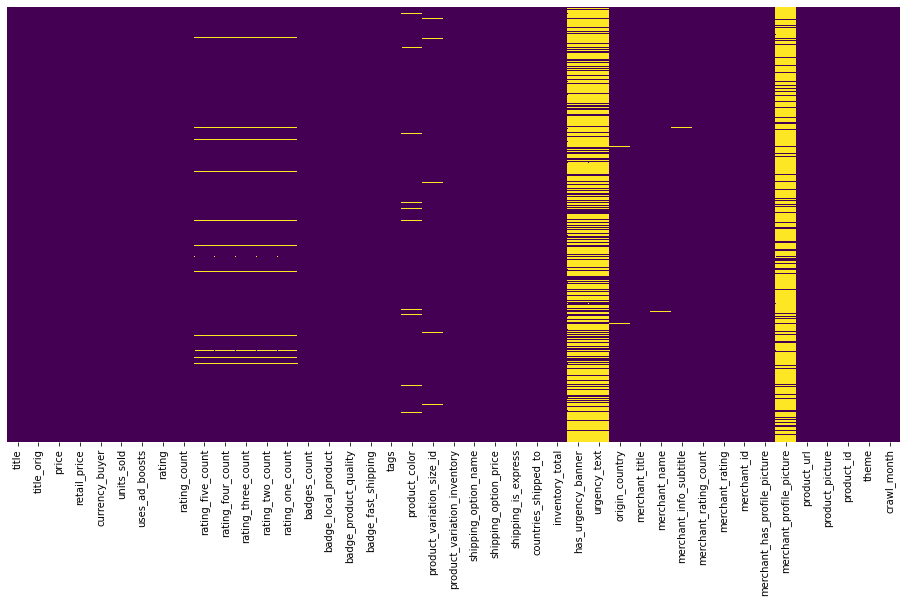

In [3]:
#Checking all nulls in the dataset
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_summer.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

In [4]:
#Checking all nulls in the dataset
(pd.isna(df_summer)).sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [5]:
#Number of rows of our Dataset
df_summer.shape[0]

1573

In [6]:
df_summer.head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


Column 'title_orig' has the original name in English, whereas 'title' has names in both English and French. Therefore, we keep column 'title_orig' to have the data in one language.

<AxesSubplot:xlabel='currency_buyer', ylabel='count'>

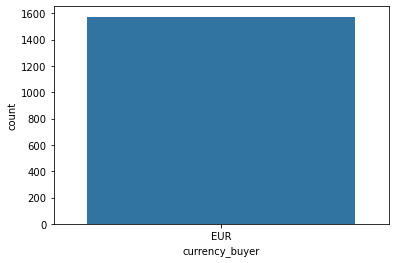

In [7]:
sns.countplot(x='currency_buyer',data=df_summer)

We can drop the column 'currency_buyer' as it has the same value "EUR" across the dataset.

<AxesSubplot:xlabel='uses_ad_boosts', ylabel='count'>

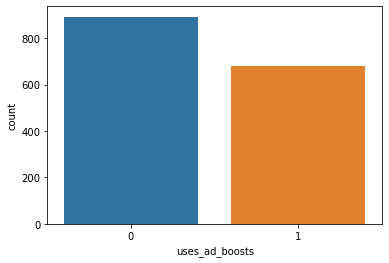

In [8]:
sns.countplot(x='uses_ad_boosts',data=df_summer)

<AxesSubplot:xlabel='badges_count', ylabel='count'>

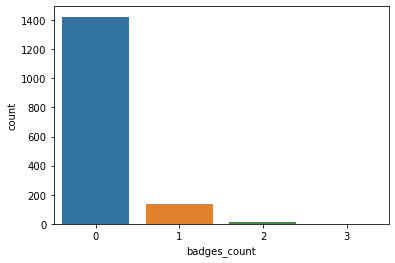

In [9]:
sns.countplot(x='badges_count',data=df_summer)

<AxesSubplot:xlabel='badge_local_product', ylabel='count'>

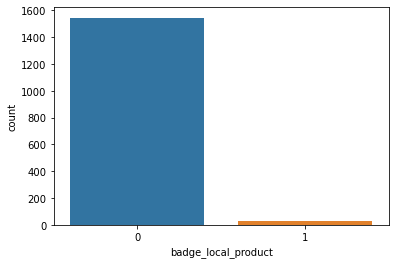

In [10]:
sns.countplot(x='badge_local_product',data=df_summer)

<AxesSubplot:xlabel='badge_product_quality', ylabel='count'>

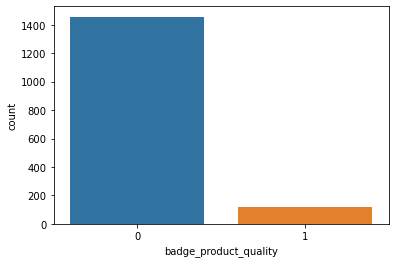

In [11]:
sns.countplot(x='badge_product_quality',data=df_summer)

<AxesSubplot:xlabel='badge_fast_shipping', ylabel='count'>

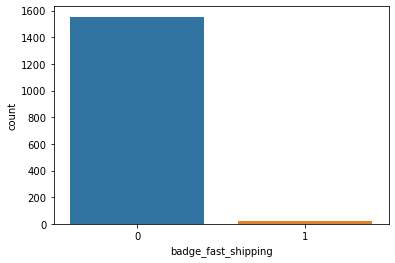

In [12]:
sns.countplot(x='badge_fast_shipping',data=df_summer)

The column 'badges_count' has the sum of the number of badges (badge_local_product, badge_product_quality and badge_fast_shipping). Therefore, we can get rid of 'badges_count' and work with the 3 badge columns as they give more detailed information.

C:\ProgramData\Anaconda3\envs\graphnn_cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\graphnn_cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\graphnn_cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\graphnn_cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3626 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\graphnn_cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\

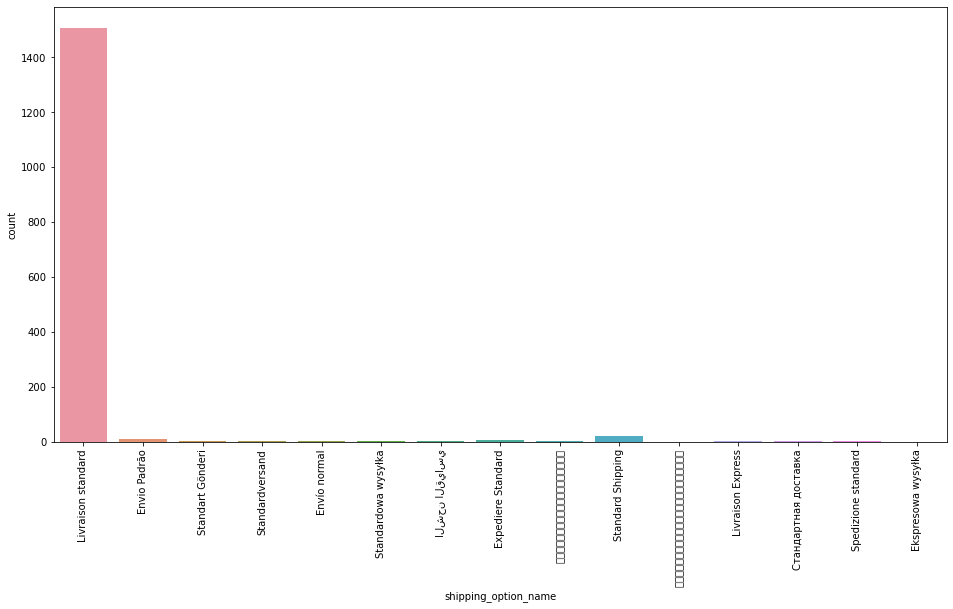

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
g = sns.countplot(x='shipping_option_name',data=df_summer,ax=ax)
g_rot = g.set_xticklabels(g.get_xticklabels(),rotation=90) #Rotating 90 degrees the brand labels

In [14]:
#Cheking out all values of 'shipping_option_name' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer.groupby(['shipping_option_name'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,shipping_option_name,count
5,Livraison standard,1508
7,Standard Shipping,21
1,Envio Padrão,9
3,Expediere Standard,6
2,Envío normal,5
12,الشحن القياسي,4
4,Livraison Express,3
8,Standardowa wysyłka,3
9,Standardversand,3
11,Стандартная доставка,3


We can see that almost all values of 'shipping_option_name' are the same and correspond to "Standard Shipping" in different languages. Therefore we drop this column.

<AxesSubplot:xlabel='shipping_option_price', ylabel='count'>

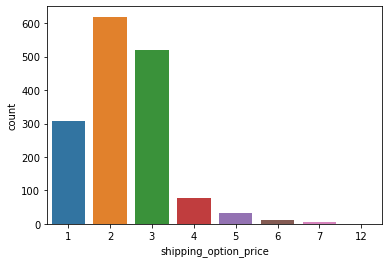

In [15]:
sns.countplot(x='shipping_option_price',data=df_summer)

The column 'shipping_option_price' is numeric and has the value of the shipping. Therefore we keep this column in our model.

<AxesSubplot:xlabel='shipping_is_express', ylabel='count'>

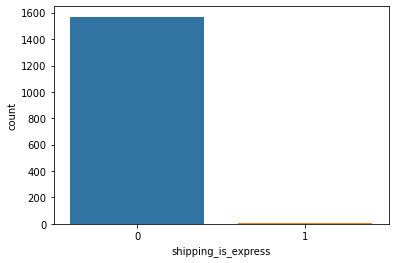

In [16]:
sns.countplot(x='shipping_is_express',data=df_summer)

In [17]:
#Cheking out all values of 'inventory_total' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer.groupby(['inventory_total'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,inventory_total,count
9,50,1563
1,2,2
0,1,1
2,9,1
3,24,1
4,30,1
5,36,1
6,37,1
7,38,1
8,40,1


As we can see, the column 'inventory_total' has the same value '50' almost always. Therefore it is not very useful for our model. We drop this feature.

Regarding columns 'has_urgency_banner' and 'urgency_text', they have 1100 missing values out of 1573 registers. It is too much, therefore we simply drop those columns.

In [18]:
#Cheking out all values of 'merchant_title', 'merchant_name', 'merchant_rating', 'merchant_rating_count'
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer.groupby(['merchant_title','merchant_name','merchant_rating','merchant_rating_count'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,merchant_title,merchant_name,merchant_rating,merchant_rating_count,count
526,guangzhouweishiweifushiyouxiangongsi,广州唯适唯服饰有限公司,3.884544,32168,15
316,Suyi Technology,greatexpectationstechnology,4.045170,12309,12
774,sjhdstoer,sjhdstoer,4.006692,80093,9
282,Sangboo Store,sangboostore,3.867547,10600,8
51,Cenic Beauty,cenicbeauty,4.105967,42919,8
770,shuilingjiao international trade company,shuilingjiaointernationaltradecompany,4.080891,88193,8
251,Pentiumhorse,pentiumhorse,4.138885,55499,7
843,witkey BL,witkeybl,4.049640,65189,6
283,SaraHouse,sarahouse,3.899673,17752,6
297,Smart Home International Co.Ltd,smarthomeinternationalcoltd,4.121484,55670,6


As most values of merchant ID columns ('merchant_title', 'merchant_name', 'merchant_id') are unique (1 ocurrence), they can't be usefully employed by our model. Therefore, we decide to drop those columns and keep the most significant ones, which are the 'merchant_rating' and the 'merchant_rating_count'.

<AxesSubplot:xlabel='merchant_has_profile_picture', ylabel='count'>

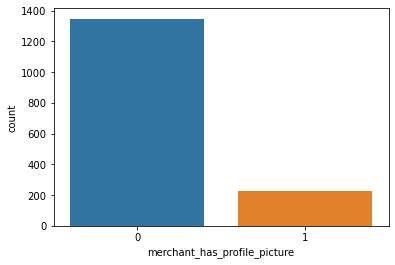

In [19]:
sns.countplot(x='merchant_has_profile_picture',data=df_summer)

Additionally, we don't need the URLs columns for this exercise. We drop those columns: 'merchant_profile_picture', 'product_url', 'product_picture'.

In [20]:
#Cheking out all values of 'product_id' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer.groupby(['product_id'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,product_id,count
1214,5ebe0ead593b960eb1c82d0b,3
1198,5eba05b08c884a0bddd0ad96,3
833,5e142dee04c3e579e89576a3,3
1177,5eb4f323b67a8d189a8f8380,3
1320,5ee8875404718a4bba2d6348,3
1127,5ea91e4d29b81241e1d43b27,3
1171,5eb4dd169263020a42be1a88,3
806,5dea1d9cec016f062ce8aab1,3
370,5c80e8a150c63d28c67b8f14,3
521,5cde56ea6bbbd86b1cbab4a8,3


As can be seen, column 'product_id' doesn't really tell us much information about our dataset because most values are unique. We decide to drop this column as well.

Finally, we drop columns 'theme' and 'crawl_month' because they have the same value repeated for all samples.

In [21]:
#Dropping non-relevant columns of the dataset
df_summer_drop = df_summer.drop(columns=['title','currency_buyer','badges_count','shipping_option_name',
                                         'inventory_total','has_urgency_banner','urgency_text','merchant_title',
                                         'merchant_name','merchant_info_subtitle','merchant_id','merchant_profile_picture',
                                         'product_url','product_picture','product_id','theme','crawl_month'])

In [22]:
df_summer_drop.head(3)

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,0,3.76,54,26.0,8.0,10.0,...,white,M,50,4,0,34,CN,568,4.128521,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,green,XS,50,2,0,41,CN,17752,3.899673,0
2,2020 New Arrival Women Spring and Summer Beach...,8.0,43,100,0,3.57,14,5.0,4.0,2.0,...,leopardprint,XS,1,3,0,36,CN,295,3.989831,0


### Data Cleaning and PreProcessing

In [23]:
#Checking all nulls in the dataset
(pd.isna(df_summer_drop)).sum()

title_orig                       0
price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
rating_five_count               45
rating_four_count               45
rating_three_count              45
rating_two_count                45
rating_one_count                45
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   41
product_variation_size_id       14
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
origin_country                  17
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

C:\ProgramData\Anaconda3\envs\graphnn_cpu_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

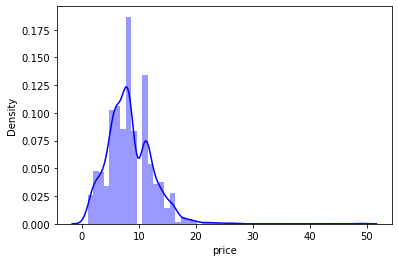

In [24]:
#Exploring the price
sns.distplot(df_summer_drop['price'],kde=True,color='blue')

C:\ProgramData\Anaconda3\envs\graphnn_cpu_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retail_price', ylabel='Density'>

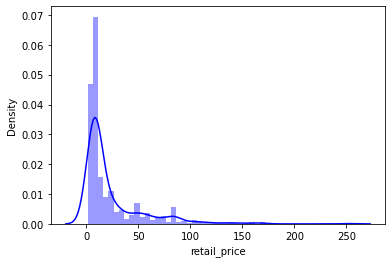

In [25]:
#Exploring the retail price
sns.distplot(df_summer_drop['retail_price'],kde=True,color='blue')

We consider the price an important feature in determining the success of a listing. Additionally, we create a new column that represents the price drop (from reatail to the final price) as a percentage.

In [26]:
def price_drop(row):
    """
    Function that computes the price drop as a percentage
    """
    price=row['price']
    retail_price=row['retail_price']
    
    price_drop = (price-retail_price)/retail_price
        
    return price_drop

In [27]:
#Create column 'price_variation' (positive means the price increased; negative means the price decreased)
df_summer_drop['price_variation'] = df_summer_drop.apply(price_drop, axis=1)

In [28]:
#Dropping price retail because now we have a price drop feature (price_variation)
df_summer_price = df_summer_drop.drop(columns=['retail_price'])

Next, we look at the rating columns. From our null values analysis, we know that there are 45 missing values for the rating countings (from 1 to 5 stars). In such cases the column 'rating_count' is set to 0 and the column 'rating' to 5 (meaning the product is new and doesn't have a rating reputation yet). We consider that columns 'rating_count' and 'rating' are very useful for our model as they give a sense of how much people has purchased the product and therefore left a rating, and how satisfied they actually were with the listing (from 1 to 5). On the other hand, we can drop the individual rating count columns (from 1 to 5 stars) because we already have a summarized value of them (rating).

In [29]:
#Dropping individual rating counts
df_summer_rating = df_summer_price.drop(columns=['rating_one_count','rating_two_count','rating_three_count',
                                                'rating_four_count', 'rating_five_count'])

In [30]:
#Cheking out all values of 'product_color' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer_rating.groupby(['product_color'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,product_color,count
13,black,302
90,white,254
100,yellow,105
20,blue,99
71,pink,99
79,red,93
40,green,90
41,grey,71
77,purple,53
11,armygreen,31


In [31]:
df_summer_prod_color = df_summer_rating.copy()

In [32]:
#Lower casing and removing white spaces to merge for example 'black' and 'Black'
df_summer_prod_color['product_color'] = df_summer_prod_color['product_color'].str.lower().replace(" ","")

In [33]:
def product_color(row):
    """
    Function that treats column 'product_color'
    """
    color_raw=row['product_color']
    
    #Colors with at least 5 ocurrences across the dataset
    if color_raw in ("black" ,"white" ,"yellow" ,"pink" ,"blue" ,"red" ,"green" ,"grey" ,"purple" ,"armygreen" ,"navyblue" ,"winered" ,"orange" ,"multicolor" ,"beige" ,"khaki" ,"lightblue" ,"gray" ,"white & green" ,"skyblue" ,"rosered" ,"brown" ,"coffee" ,"darkblue" ,"rose" ,"floral"):
        color_new = color_raw
    #The rest go to a common label "other"
    else:
        color_new = "other"
    
    return color_new

In [34]:
#Create column 'color_new'
df_summer_prod_color['color_new'] = df_summer_prod_color.apply(product_color, axis=1)

In [35]:
#Cheking out all values of 'color_new' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer_prod_color.groupby(['color_new'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,color_new,count
2,black,305
23,white,257
16,other,158
26,yellow,105
17,pink,101
3,blue,100
19,red,94
9,green,90
10,grey,71
18,purple,53


In [36]:
#Dropping old column 'product_color'
df_summer_color_new = df_summer_prod_color.drop(columns=['product_color'])

In [37]:
df_summer_size = df_summer_color_new.copy()

In [38]:
#Cheking out all values of 'product_variation_size_id' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer_size.groupby(['product_variation_size_id'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,product_variation_size_id,count
55,S,641
92,XS,356
50,M,200
95,XXS,100
48,L,49
61,S.,18
91,XL,17
94,XXL,15
97,XXXS,6
32,4XL,5


In [39]:
#Upper casing 
df_summer_size['product_variation_size_id'] = df_summer_size['product_variation_size_id'].str.upper()

In [40]:
#Cheking out all values of 'product_variation_size_id' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer_size.groupby(['product_variation_size_id'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,product_variation_size_id,count
59,S,646
93,XS,356
53,M,200
96,XXS,100
51,L,49
65,S.,18
92,XL,17
95,XXL,15
70,SIZE S,8
98,XXXS,6


In [41]:
#Removing unrelevant characters
remove_characters = [" ", ".", "-", "SIZE",]
for character in remove_characters:
    #a_string = a_string.replace(character, "")
    df_summer_size['product_variation_size_id'] = df_summer_size['product_variation_size_id'].str.replace(character,"")

In [42]:
#Cheking out all values of 'product_variation_size_id' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer_size.groupby(['product_variation_size_id'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,product_variation_size_id,count
57,S,679
72,XS,369
52,M,206
74,XXS,107
51,L,54
71,XL,18
73,XXL,15
32,4XL,8
76,XXXS,6
20,2XL,4


In [43]:
def product_size(row):
    """
    Function that treats column 'product_variation_size_id'
    """
    size_raw=row['product_variation_size_id']
    
    #We keep sizes with at least 3-4 ocurrences across the dataset
    if size_raw in ("S" ,"XS" ,"M" ,"XXS" ,"L" ,"XL" ,"XXL" ,"4XL" ,"XXXS", "5XL"):
        size_new = size_raw
    #We treat for the case of 2XL and XXL sizes. We need to merge them
    elif size_raw == '2XL':
        size_new = 'XXL'
    #The rest go to a common label "other"
    else:
        size_new = "other"
    
    return size_new

In [44]:
#Create column 'size_new'
df_summer_size['size_new'] = df_summer_size.apply(product_size, axis=1)

In [45]:
#Cheking out all values of 'size_new' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer_size.groupby(['size_new'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,size_new,count
4,S,679
6,XS,369
3,M,206
8,XXS,107
10,other,104
2,L,54
7,XXL,19
5,XL,18
0,4XL,8
9,XXXS,6


In [46]:
#Dropping old column 'product_variation_size_id'
df_summer_size_new = df_summer_size.drop(columns=['product_variation_size_id'])

Column product_variation_inventory is the Inventory the seller has. Max allowed quantity is 50. We consider this an important feature for the model. Therefore we keep this column.

C:\ProgramData\Anaconda3\envs\graphnn_cpu_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='countries_shipped_to', ylabel='Density'>

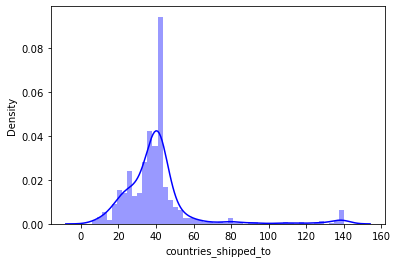

In [47]:
#Exploring the countries shipped to column
sns.distplot(df_summer_size_new['countries_shipped_to'],kde=True,color='blue')

Feature 'origin_country'

In [48]:
df_summer_orig = df_summer_size_new.copy()

In [49]:
#Cheking out all values of 'origin_country' and number of ocurrences
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer_orig.groupby(['origin_country'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,origin_country,count
1,CN,1516
4,US,31
5,VE,5
3,SG,2
0,AT,1
2,GB,1


In [50]:
def origin_country(row):
    """
    Function that treats column 'origin_country'
    """
    origin_raw=row['origin_country']
    
    #We keep top 3 origin countries
    if origin_raw in ("CN", "US", "VE"):
        origin_new = origin_raw
    #The rest go to a common label "other" (including the missing values)
    else:
        origin_new = "other"
    
    return origin_new

In [51]:
#Create column 'orig_country_new'
df_summer_orig['orig_country_new'] = df_summer_orig.apply(origin_country, axis=1)

In [52]:
#Cheking out 'orig_country_new'
with pd.option_context('display.max_rows', None,'display.max_colwidth', None):
    display(df_summer_orig.groupby(['orig_country_new'])['title_orig'].count().reset_index(name="count").sort_values(by='count', ascending=False))

,orig_country_new,count
0,CN,1516
1,US,31
3,other,21
2,VE,5


In [53]:
#Dropping old column 'origin_country'
df_summer_orig_new = df_summer_orig.drop(columns=['origin_country'])

### Adding the most common tags as features

In [54]:
#Transforming tags column into a list
tags_full_list = df_summer_orig_new["tags"].tolist()

In [55]:
#Converting the list into one single text
tags_text = ','.join(tags_full_list)

In [56]:
#Printing most common tags
print(Counter(tags_text.split(",")))

Counter({'Summer': 1321, "Women's Fashion": 1315, 'Fashion': 1082, 'Women': 961, 'Casual': 905, 'Plus Size': 636, 'sleeveless': 580, 'Dress': 549, 'Shorts': 540, 'Tops': 507, 'sexy': 328, 'Beach': 324, 'Sleeve': 300, 'Print': 296, 'short sleeves': 296, 'Shirt': 281, 'Tank': 265, 'Necks': 254, 'V-neck': 241, 'printed': 235, 'T Shirts': 235, 'tank top': 219, 'Cotton': 216, 'summer dress': 212, 'Ladies': 212, 'Loose': 204, 'blouse': 201, 'pants': 197, 'Vest': 189, 'beach dress': 185, 'Floral': 174, 'women dress': 174, 'Lace': 173, 'Mini dress': 170, 'Mini': 164, 'slim': 162, 'Sleeveless dress': 151, 'Women Fashion': 142, 'Round neck': 139, 'casual dress': 136, 'Waist': 130, 'party': 129, 'long dress': 123, 'Party Dress': 120, 'Sport': 109, 'Floral print': 108, 'Slim Fit': 107, 'Spaghetti': 106, 'backless': 104, 'jumpsuit': 99, 'Short pants': 95, 'Bikini': 91, 'Swimsuit': 88, 'loose dress': 86, 'high waist': 86, 'boho': 86, 'Swimwear': 85, 'Swimming': 84, 'Dresses': 79, 'Halter': 77, 'Skir

We can clearly see the most common tags across the dataset: 'Summer', 'Women's Fashion', 'Fashion', 'Women', 'Casual', etc.

In [57]:
df_summer_tags = df_summer_orig_new.copy()

In [58]:
def extract_tags(tags):
    """
    Function that extracts the most important tags
    """
    if "Summer" in tags:
        tag_summer = 1
    else:
        tag_summer = 0
        
    if "Women's Fashion" in tags:
        tag_wf = 1
    else:
        tag_wf = 0    
        
    if "Fashion" in tags:
        tag_fashion = 1
    else:
        tag_fashion = 0
        
    if "Women" in tags:
        tag_women = 1
    else:
        tag_women = 0
    
    if "Casual" in tags:
        tag_casual = 1
    else:
        tag_casual = 0
        
    if "Plus Size" in tags:
        tag_p_size = 1
    else:
        tag_p_size = 0    
        
    if "sleeveless" in tags:
        tag_sleeveless = 1
    else:
        tag_sleeveless = 0
        
    if "Dress" in tags:
        tag_dress = 1
    else:
        tag_dress = 0  
        
    if "Shorts" in tags:
        tag_shorts = 1
    else:
        tag_shorts = 0
        
    if "Tops" in tags:
        tag_tops = 1
    else:
        tag_tops = 0    
        
    if "sexy" in tags:
        tag_sexy = 1
    else:
        tag_sexy = 0
        
    if "Beach" in tags:
        tag_beach = 1
    else:
        tag_beach = 0  

    if "Sleeve" in tags:
        tag_sleeve = 1
    else:
        tag_sleeve = 0
        
    if "Print" in tags:
        tag_print = 1
    else:
        tag_print = 0    
        
    if "short sleeves" in tags:
        tag_short_sleev = 1
    else:
        tag_short_sleev = 0
        
    if "Shirt" in tags:
        tag_shirt = 1
    else:
        tag_shirt = 0          

    if "Tank" in tags:
        tag_tank = 1
    else:
        tag_tank = 0
        
    if "Necks" in tags:
        tag_necks = 1
    else:
        tag_necks = 0    
        
    if "V-neck" in tags:
        tag_v_neck = 1
    else:
        tag_v_neck = 0
        
    if "printed" in tags:
        tag_printed = 1
    else:
        tag_printed = 0           
    
    if "T Shirts" in tags:
        tag_t_shirts = 1
    else:
        tag_t_shirts = 0        
    
    if "tank top" in tags:
        tag_tank_top = 1
    else:
        tag_tank_top = 0 
    
    if "Cotton" in tags:
        tag_cotton = 1
    else:
        tag_cotton = 0     
    
    if "summer dress" in tags:
        tag_summer_dress = 1
    else:
        tag_summer_dress = 0      
    
    if "Ladies" in tags:
        tag_ladies = 1
    else:
        tag_ladies = 0    
    
    if "Loose" in tags:
        tag_loose = 1
    else:
        tag_loose = 0 
        
    if "blouse" in tags:
        tag_blouse = 1
    else:
        tag_blouse = 0         
        
    if "pants" in tags:
        tag_pants = 1
    else:
        tag_pants = 0            
       
    return tag_summer ,tag_wf ,tag_fashion ,tag_women ,tag_casual ,tag_p_size ,tag_sleeveless ,tag_dress ,tag_shorts ,tag_tops ,tag_sexy ,tag_beach ,tag_sleeve ,tag_print ,tag_short_sleev ,tag_shirt ,tag_tank ,tag_necks ,tag_v_neck ,tag_printed ,tag_t_shirts ,tag_tank_top ,tag_cotton ,tag_summer_dress ,tag_ladies ,tag_loose ,tag_blouse ,tag_pants

In [59]:
#Create columns for most relevant tags
df_summer_tags['tag_summer'] ,df_summer_tags['tag_wf'] ,df_summer_tags['tag_fashion'] ,df_summer_tags['tag_women'] ,df_summer_tags['tag_casual'] ,df_summer_tags['tag_p_size'] ,df_summer_tags['tag_sleeveless'] ,df_summer_tags['tag_dress'] ,df_summer_tags['tag_shorts'] ,df_summer_tags['tag_tops'] ,df_summer_tags['tag_sexy'] ,df_summer_tags['tag_beach'] ,df_summer_tags['tag_sleeve'] ,df_summer_tags['tag_print'] ,df_summer_tags['tag_short_sleev'] ,df_summer_tags['tag_shirt'] ,df_summer_tags['tag_tank'] ,df_summer_tags['tag_necks'] ,df_summer_tags['tag_v_neck'] ,df_summer_tags['tag_printed'] ,df_summer_tags['tag_t_shirts'] ,df_summer_tags['tag_tank_top'] ,df_summer_tags['tag_cotton'] ,df_summer_tags['tag_summer_dress'] ,df_summer_tags['tag_ladies'] ,df_summer_tags['tag_loose'] ,df_summer_tags['tag_blouse'] ,df_summer_tags['tag_pants'] = zip(*df_summer_tags["tags"].map(extract_tags))

In [60]:
df_summer_tags.head(3)

,title_orig,price,units_sold,uses_ad_boosts,rating,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,...,tag_v_neck,tag_printed,tag_t_shirts,tag_tank_top,tag_cotton,tag_summer_dress,tag_ladies,tag_loose,tag_blouse,tag_pants
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,100,0,3.76,54,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",...,0,1,0,0,0,0,0,0,0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,20000,1,3.45,6135,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",...,0,0,0,0,0,1,0,0,0,0
2,2020 New Arrival Women Spring and Summer Beach...,8.0,100,0,3.57,14,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",...,0,1,0,0,0,0,0,0,0,0


In [61]:
#We drop the title and tags columns as now we have the tag features in our dataset
df_summer_drop_tags = df_summer_tags.drop(columns=['title_orig', 'tags'])

### Encoding of Categorical DataPoints

In [62]:
#Checking all nulls in the dataset
(pd.isna(df_summer_drop_tags)).sum()

price                           0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
price_variation                 0
color_new                       0
size_new                        0
orig_country_new                0
tag_summer                      0
tag_wf                          0
tag_fashion                     0
tag_women                       0
tag_casual                      0
tag_p_size                      0
tag_sleeveless                  0
tag_dress                       0
tag_shorts                      0
tag_tops                        0
tag_sexy      

We split our dataframe into the input features and the desired output

In [63]:
#desired output
y_data = df_summer_drop_tags[["units_sold"]]

C:\ProgramData\Anaconda3\envs\graphnn_cpu_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='units_sold', ylabel='Density'>

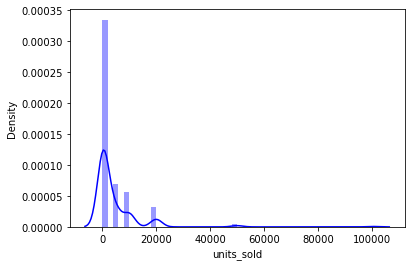

In [64]:
#Exploring the number of units sold
sns.distplot(y_data['units_sold'],kde=True,color='blue')

In [65]:
#input features
X_data_drop = df_summer_drop_tags.drop("units_sold",axis=1)

In [66]:
#Applying one hot encoding to prepare to train the model
X_data_dummies = pd.get_dummies(X_data_drop)

### Modeling

Transforming our X and y dataframes into numpy arrays suitable for the model

In [67]:
X_data_np = X_data_dummies.to_numpy()

In [68]:
y_data_np = y_data.to_numpy()
y_data_np_reshape = y_data_np.reshape(-1)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_data_np, y_data_np_reshape, test_size=0.2,random_state=10)

In [71]:
X_train.shape

(1258, 85)

In [72]:
X_test.shape

(315, 85)

1) Training a Decision Tree

In [147]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.inspection import permutation_importance

In [74]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0) #Using by default hyperparameters
  
# fit the regressor with X_train and y_train data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [75]:
y_pred = regressor.predict(X_test)

In [76]:
#Computing RMSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 18356414.8
Root Mean Squared Error: 4284.438679687224


In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 10, 15, 20, 30, 50, 100],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

best_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
best_max_depth=grid_search.best_estimator_.max_depth
best_min_samples_split=grid_search.best_estimator_.min_samples_split

print("best_max_depth ", best_max_depth)
print("best_min_samples_split ", best_min_samples_split)

best_rmse  4168.953404452683
best_max_depth  6
best_min_samples_split  3


In [149]:
y_pred = best_tree.predict(X_test)
# Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# R2 Score
r2 = r2_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Median Absolute Error
mdae = median_absolute_error(y_test, y_pred)

# Explained Variance Score
ev = explained_variance_score(y_test, y_pred)


print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('MdAE: {:.2f}'.format(mdae))
print('R2: {:.2f}'.format(r2))
print('EV: {:.2f}'.format(ev))

Testing performance
RMSE: 4168.95
MAE: 1327.33
MdAE: 226.18
R2: 0.49
EV: 0.49


2) Training a Random Forest

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
#Training a Random Forest using the BY DEFAULT HYPERPARAMETERS
rfr = RandomForestRegressor(random_state=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [140]:
y_pred = rfr.predict(X_test)

In [141]:
#Computing RMSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 6795129.219335238
Root Mean Squared Error: 2606.7468652201806


Now, let's try to do some hyperparameter tuning

In [142]:
#Let's see if we can improve this accuracy by using different Hyperparameters

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 3000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000], 'max_features': ['auto', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [143]:
#Use the random grid to search for best hyperparameters
#RandomizedSearchCV allows us to do K-fold cross validation
#First create the base model to tune
rfr = RandomForestRegressor(random_state=11)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=11),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 600, 900, 1200,
                                                         1500, 1800, 2100, 2400,
                                                         2700, 3000]},
                   random_state=42, verbose=2)

In [144]:
rfr_random.best_params_ #Best HyperParameters

{'n_estimators': 2700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 40}

In [145]:
best_randomf = rfr_random.best_estimator_

In [148]:
y_pred = best_randomf.predict(X_test)
# Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# R2 Score
r2 = r2_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Median Absolute Error
mdae = median_absolute_error(y_test, y_pred)

# Explained Variance Score
ev = explained_variance_score(y_test, y_pred)


print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('MdAE: {:.2f}'.format(mdae))
print('R2: {:.2f}'.format(r2))
print('EV: {:.2f}'.format(ev))

Testing performance
RMSE: 2414.45
MAE: 1033.66
MdAE: 293.29
R2: 0.83
EV: 0.83


3) Training Bagging Regressor

In [89]:
from sklearn.ensemble import BaggingRegressor

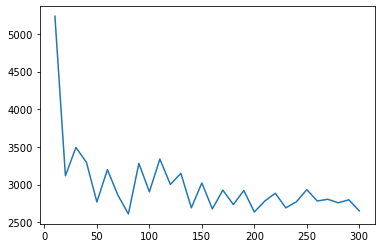

In [90]:
N = 30
rmse = np.zeros(N)

for i in range(N):
    reg = BaggingRegressor(DecisionTreeRegressor(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse[i]=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

plt.plot([10*(i+1) for i in range(30)], rmse)

We can see how after some number of estimators, the RMSE stabilizes.

In [91]:
from sklearn.model_selection import GridSearchCV

In [136]:
pgrid = {"n_estimators": [10,20,30,40,50,75,100,125,150,200],
        "max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}

grid_search = GridSearchCV(BaggingRegressor(DecisionTreeRegressor()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
best_random = grid_search.best_estimator_
best_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
best_n_estimators=grid_search.best_estimator_.n_estimators
best_max_samples=grid_search.best_estimator_.max_samples
best_max_features=grid_search.best_estimator_.max_features

print("best_rmse ", best_rmse)
print("best_n_estimators ", best_n_estimators)
print("best_max_samples ", best_max_samples)
print("best_max_features ", best_max_features)

best_rmse  2258.2860125282086
best_n_estimators  200
best_max_samples  0.6
best_max_features  0.8


In [150]:
y_pred = best_random.predict(X_test)
# Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# R2 Score
r2 = r2_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Median Absolute Error
mdae = median_absolute_error(y_test, y_pred)

# Explained Variance Score
ev = explained_variance_score(y_test, y_pred)


print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('MdAE: {:.2f}'.format(mdae))
print('R2: {:.2f}'.format(r2))
print('EV: {:.2f}'.format(ev))

Testing performance
RMSE: 2258.29
MAE: 1425.20
MdAE: 758.20
R2: 0.85
EV: 0.86


4) Training Extremely Randomized Trees

In [156]:
from sklearn.ensemble import ExtraTreesRegressor

In [160]:
model = ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features=85)
                            
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': [50, 100],
        'max_features': [20, 40, 85],
        'min_samples_leaf': [20, 30, 40],
        'min_samples_split': [15, 25, 35],
    },
    scoring='r2',
    cv=5
)

grid_result = gsc.fit(X_train, y_train)

In [162]:
gsc.best_params_

{'max_features': 85,
 'min_samples_leaf': 20,
 'min_samples_split': 35,
 'n_estimators': 50}

In [161]:
y_pred = grid_result.predict(X_test)
# Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# R2 Score
r2 = r2_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Median Absolute Error
mdae = median_absolute_error(y_test, y_pred)

# Explained Variance Score
ev = explained_variance_score(y_test, y_pred)


print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('MdAE: {:.2f}'.format(mdae))
print('R2: {:.2f}'.format(r2))
print('EV: {:.2f}'.format(ev))

Testing performance
RMSE: 2556.26
MAE: 1570.08
MdAE: 726.83
R2: 0.81
EV: 0.82


5) Training Adaboosting

In [96]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

ada_tree_backing = DecisionTreeRegressor(max_depth=3, random_state=0, min_samples_leaf=4)
ada = AdaBoostRegressor(base_estimator=ada_tree_backing, random_state=0)
#The maximum number of estimators at which boosting is terminated
n_estimators = [x for x in np.arange(1,101,5)]
learning_rate = [0.001, 0.01, 0.1,1]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}
print(random_grid)

{'n_estimators': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96], 'learning_rate': [0.001, 0.01, 0.1, 1]}


In [97]:
ada_random = RandomizedSearchCV(estimator = ada, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=5, random_state=0, n_jobs = -1)
ada_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    3.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    3.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.0s finished


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                                                    min_samples_leaf=4,
                                                                                    random_state=0),
                                               random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1],
                                        'n_estimators': [1, 6, 11, 16, 21, 26,
                                                         31, 36, 41, 46, 51, 56,
                                                         61, 66, 71, 76, 81, 86,
                                                         91, 96]},
                   random_state=0, verbose=5)

In [98]:
ada_random.best_params_

{'n_estimators': 36, 'learning_rate': 0.01}

In [99]:
ada_best_random = ada_random.best_estimator_

In [151]:
y_pred = ada_best_random.predict(X_test)
# Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# R2 Score
r2 = r2_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Median Absolute Error
mdae = median_absolute_error(y_test, y_pred)

# Explained Variance Score
ev = explained_variance_score(y_test, y_pred)


print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('MdAE: {:.2f}'.format(mdae))
print('R2: {:.2f}'.format(r2))
print('EV: {:.2f}'.format(ev))

Testing performance
RMSE: 2699.55
MAE: 1319.54
MdAE: 504.20
R2: 0.79
EV: 0.79


6) Training Gradient Boosting

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=0)
learning_rate = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 1]
# Number of trees in random forest
n_estimators = [x for x in np.arange(1,101)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'learning_rate': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 1], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 17, 24, 31, 38, 45, 52, 60, 67, 74, 81, 88, 95, 102, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 5]}


In [103]:
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 55, cv = 10, verbose=3, random_state=0, n_jobs = -1)
gb_random.fit(X_train, y_train)

Fitting 10 folds for each of 55 candidates, totalling 550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:   55.1s finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=55, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.02,
                                                          0.03, 0.04, 0.05, 0.1,
                                                          1],
                                        'max_depth': [10, 17, 24, 31, 38, 45,
                                                      52, 60, 67, 74, 81, 88,
                                                      95, 102, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 

In [104]:
gb_random.best_params_

{'n_estimators': 39,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 31,
 'learning_rate': 0.04}

In [128]:
gb_best_random = gb_random.best_estimator_

In [152]:
y_pred = gb_best_random.predict(X_test)
# Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# R2 Score
r2 = r2_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Median Absolute Error
mdae = median_absolute_error(y_test, y_pred)

# Explained Variance Score
ev = explained_variance_score(y_test, y_pred)


print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('MdAE: {:.2f}'.format(mdae))
print('R2: {:.2f}'.format(r2))
print('EV: {:.2f}'.format(ev))

Testing performance
RMSE: 2566.18
MAE: 1540.15
MdAE: 932.80
R2: 0.81
EV: 0.81


7)CatBoost Regression

In [110]:
! pip install catboost
! pip install ipywidgets
! pip install ipywidgets
import catboost as cb

In [113]:
model = cb.CatBoostRegressor(loss_function='RMSE')
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)


bestTest = 4629.990007
bestIteration = 98

0:	loss: 4629.9900075	best: 4629.9900075 (0)	total: 760ms	remaining: 1m 12s

bestTest = 4408.758162
bestIteration = 45

1:	loss: 4408.7581619	best: 4408.7581619 (1)	total: 1.56s	remaining: 1m 13s

bestTest = 4624.090621
bestIteration = 98

2:	loss: 4624.0906214	best: 4408.7581619 (1)	total: 1.97s	remaining: 1m 1s

bestTest = 4486.723145
bestIteration = 31

3:	loss: 4486.7231455	best: 4408.7581619 (1)	total: 2.8s	remaining: 1m 4s

bestTest = 4728.757902
bestIteration = 98

4:	loss: 4728.7579023	best: 4408.7581619 (1)	total: 3.61s	remaining: 1m 5s

bestTest = 4524.779945
bestIteration = 45

5:	loss: 4524.7799449	best: 4408.7581619 (1)	total: 4.53s	remaining: 1m 7s

bestTest = 4852.998346
bestIteration = 99

6:	loss: 4852.9983465	best: 4408.7581619 (1)	total: 5.08s	remaining: 1m 4s

bestTest = 4611.61235
bestIteration = 49

7:	loss: 4611.6123504	best: 4408.7581619 (1)	total: 5.63s	remaining: 1m 1s

bestTest = 4562.314781
bestIteration = 132

8:	


bestTest = 4900.489656
bestIteration = 158

69:	loss: 4900.4896565	best: 4368.7280778 (67)	total: 47.7s	remaining: 17.7s

bestTest = 4783.465252
bestIteration = 198

70:	loss: 4783.4652516	best: 4368.7280778 (67)	total: 48.7s	remaining: 17.2s

bestTest = 4651.68992
bestIteration = 194

71:	loss: 4651.6899199	best: 4368.7280778 (67)	total: 49.6s	remaining: 16.5s

bestTest = 5133.259753
bestIteration = 99

72:	loss: 5133.2597528	best: 4368.7280778 (67)	total: 50.8s	remaining: 16s

bestTest = 4818.498148
bestIteration = 92

73:	loss: 4818.4981484	best: 4368.7280778 (67)	total: 51.9s	remaining: 15.4s

bestTest = 5229.426873
bestIteration = 99

74:	loss: 5229.4268726	best: 4368.7280778 (67)	total: 53.2s	remaining: 14.9s

bestTest = 4897.30317
bestIteration = 94

75:	loss: 4897.3031700	best: 4368.7280778 (67)	total: 54.3s	remaining: 14.3s

bestTest = 5562.894502
bestIteration = 99

76:	loss: 5562.8945015	best: 4368.7280778 (67)	total: 55.4s	remaining: 13.7s

bestTest = 5340.618952
bestItera

In [153]:
y_pred = model.predict(X_test)
# Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# R2 Score
r2 = r2_score(y_test, y_pred)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Median Absolute Error
mdae = median_absolute_error(y_test, y_pred)

# Explained Variance Score
ev = explained_variance_score(y_test, y_pred)


print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('MdAE: {:.2f}'.format(mdae))
print('R2: {:.2f}'.format(r2))
print('EV: {:.2f}'.format(ev))

Testing performance
RMSE: 2381.93
MAE: 1161.59
MdAE: 447.23
R2: 0.83
EV: 0.84


In [ ]:
#Converting our test labels and predictions into a dataframe to export them as CSV
y_test_expanded = np.expand_dims(y_test,axis=1)
y_pred_expanded = np.expand_dims(y_pred,axis=1)
y_test_pred_concat = np.concatenate((y_test_expanded, y_pred_expanded), axis=1)
df_pred_concat = pd.DataFrame(y_test_pred_concat, columns=["y_test", "y_pred"])
df_pred_concat.to_csv('df_predicted.csv', index = False, header=True)

### CONCLUDING REMARKS

- In the process of feature engineering, we convert the raw data into cleaned data.
- We introduce 7 regression models, and train our data on all the models.
- We use explanatory and numerical indicators to test our model, and get the result that bagging models are better than boosting models in our experiment.